# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Dependencies
import pickle
import matplotlib.pyplot as plt
from helper_functions import data_processing as dp
import numpy as np
from sklearn.utils import shuffle
import os

In [2]:
# Load pickled data

training_file = "./datasets/normalized_data/train.p"
validation_file = "./datasets/normalized_data/valid.p"
testing_file = "./datasets/normalized_data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("Successfully loaded the data!")

Successfully loaded the data!


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = 34799

# Number of validation examples
n_validation = 4410

# Number of testing examples.
n_test = 12630

# What's the shape of an traffic sign image?
image_shape = (32, 32)

# How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

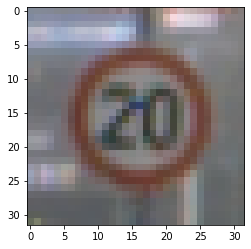

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.imshow(X_train[10000])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project.

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### 1. Turn the data set into greyscale

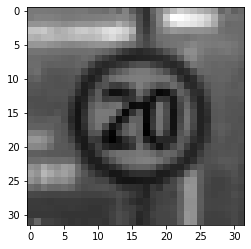

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# dp.img_array_rgb2gray(X_train[10000])
X_test_grey = []
for i in range(X_test.shape[0]):
    X_test_grey.append(dp.img_array_rgb2gray(X_test[i]))
X_test_grey = np.array(X_test_grey)

X_train_grey = []
for i in range(X_train.shape[0]):
    X_train_grey.append(dp.img_array_rgb2gray(X_train[i]))
X_train_grey = np.array(X_train_grey).astype("float32")

X_valid_grey = []
for i in range(X_valid.shape[0]):
    X_valid_grey.append(dp.img_array_rgb2gray(X_valid[i]))
X_valid_grey = np.array(X_valid_grey)

plt.imshow(X_train_grey[10000], cmap="gray")

#### 2. Shuffle the data and add a dimension to X_train

In [6]:
X_train_grey = X_train_grey[:, :, :, np.newaxis]
X_valid_grey = X_valid_grey[:, :, :, np.newaxis]
X_test_grey = X_test_grey[:, :, :, np.newaxis]
X_train_grey, y_train = shuffle(X_train_grey, y_train)

### Model Architecture

#### 1. The Tensorflow Model

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from helper_functions.lenet_structure import *

/home/lixing/anaconda3/envs/IntroToTensorFlow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lixing/anaconda3/envs/IntroToTensorFlow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lixing/anaconda3/envs/IntroToTensorFlow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lixing/

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### 0. Whether to start a new training session

In [8]:
new_train = False
saved_file_prefix = "./lenet"

#### 1. Build the tensorflow optimizer

In [9]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

tf_logits = lenet_tf(x, keep_prob)
'''
else:
    with tf.Session() as sess:
        restorer = tf.train.import_meta_graph(saved_file_prefix + ".meta")
        restorer.restore(sess, tf.train.latest_checkpoint("./"))
        graph = tf.get_default_graph()
'''
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=tf_logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate_dacayed)
training_operation = optimizer.minimize(loss_operation, global_step=global_step)



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



#### 2. Build the tensorflow evaluator

In [10]:
correct_prediction = tf.equal(tf.argmax(tf_logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#### 3. Train the Model

In [20]:
### Uncomment the following code for a new round of training
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    if new_train:
        list_training_accuracy = [0]
        list_validation_accuracy = [0]
        stabled_times = 0

        print("Training...")
        for i in range(EPOCHS):
            X_train_grey, y_train = shuffle(X_train_grey, y_train)
            for offset in range(0, n_train, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train_grey[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:drop_out_rate})

            list_validation_accuracy.append(evaluate(X_valid_grey, y_valid))
            list_training_accuracy.append(evaluate(X_train_grey, y_train))
            print("EPOCH {} ...".format(i+1))
            if i % 5 == 0:
                print("Validation Accuracy = {:.3f}".format(list_validation_accuracy[-1]), "Training Accuracy = {:.3f}".format(list_training_accuracy[-1]))
                print()

            if abs(list_validation_accuracy[-1] - list_validation_accuracy[-2]) <= stable_gap:
                stabled_times += 1
            else:
                stabled_times = 0

            if stabled_times >= quit_stabled_times:
                break

        saver.save(sess, './lenet')
        print("Model saved. Final Result:")
        print("Validation Accuracy = {:.3f}".format(list_validation_accuracy[-1]), "Training Accuracy = {:.3f}".format(list_training_accuracy[-1]))

Training...
EPOCH 1 ...
Validation Accuracy = 0.459 Training Accuracy = 0.510

EPOCH 2 ...
EPOCH 3 ...
EPOCH 4 ...
EPOCH 5 ...
EPOCH 6 ...
Validation Accuracy = 0.878 Training Accuracy = 0.920

EPOCH 7 ...
EPOCH 8 ...
EPOCH 9 ...
EPOCH 10 ...
EPOCH 11 ...
Validation Accuracy = 0.939 Training Accuracy = 0.976

EPOCH 12 ...
EPOCH 13 ...
EPOCH 14 ...
EPOCH 15 ...
EPOCH 16 ...
Validation Accuracy = 0.940 Training Accuracy = 0.984

EPOCH 17 ...
EPOCH 18 ...
EPOCH 19 ...
EPOCH 20 ...
EPOCH 21 ...
Validation Accuracy = 0.940 Training Accuracy = 0.987

EPOCH 22 ...
EPOCH 23 ...
EPOCH 24 ...
EPOCH 25 ...
EPOCH 26 ...
Validation Accuracy = 0.959 Training Accuracy = 0.992

EPOCH 27 ...
EPOCH 28 ...
EPOCH 29 ...
EPOCH 30 ...
EPOCH 31 ...
Validation Accuracy = 0.953 Training Accuracy = 0.994

EPOCH 32 ...
EPOCH 33 ...
EPOCH 34 ...
EPOCH 35 ...
EPOCH 36 ...
Validation Accuracy = 0.953 Training Accuracy = 0.995

EPOCH 37 ...
EPOCH 38 ...
EPOCH 39 ...
EPOCH 40 ...
EPOCH 41 ...
Validation Accuracy = 0.

#### 4. Evaluate the Model

In [21]:
with tf.Session() as sess:
    # saver.restore(sess, './lenet')
    # sess.run(tf.global_variables_initializer())
    #saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('./'))

    test_accuracy = evaluate(X_test_grey, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.939


#### 5. Draw the Training Curve

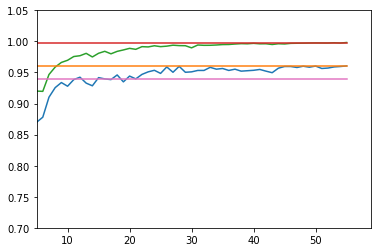

In [22]:
### Uncomment the following code for a new round of training
if new_train:
    xdata = np.arange(i + 2)
    y_upper = np.ones(i + 2) * np.max(list_training_accuracy)
    y_valid_upper = np.ones(i + 2) * np.max(list_validation_accuracy)
    y_test_upper = np.ones(i + 2) * test_accuracy

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(xdata, np.array(list_validation_accuracy), color='tab:blue')
    ax.plot(xdata, np.array(list_training_accuracy), color='tab:green')
    ax.plot(xdata, y_upper, color='tab:red')
    ax.plot(xdata, y_valid_upper, color='tab:orange')
    ax.plot(xdata, y_test_upper, color='tab:pink')

    ax.set_xlim([5,i+5])
    ax.set_ylim([0.7, 1.05])

    fig.savefig("./references/results/training_curve.jpg")

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

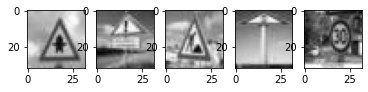

In [35]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
root_dir = "./references/test_image/normalized/"

accurate_pred = np.array([11, 18, 25, 26, 1])

fig = plt.figure(1)
subplot_index = 151
img_list = []
for filename in sorted(os.listdir(root_dir)):
    plt.subplot(subplot_index)
    img_list.append(plt.imread(root_dir+filename))
    plt.imshow(img_list[-1], cmap="gray")
    subplot_index += 1

### Predict the Sign Type for Each Image

In [43]:
# Form an nx32x32x1 nparray as input.
input_img_arr = np.array(img_list, dtype=np.int32)
input_img_arr = input_img_arr[:, :, :, np.newaxis]

tf_softmax = tf.nn.softmax(tf_logits)

# Feed the input into the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    logits_predicted = sess.run(tf_logits, feed_dict={x:input_img_arr, keep_prob:1})
    softmax_predicted = sess.run(tf_softmax, feed_dict={x:input_img_arr, keep_prob:1})

# Print the result logits

prediction = np.argmax(softmax_predicted, axis=1)
# print(softmax_pricted)
print("The predicted classes for 5 new images are:\n", prediction)

INFO:tensorflow:Restoring parameters from ./lenet
The predicted classes for 5 new images are:
 [11 40 25 28 25]


### Analyze Performance

In [44]:
### Calculate the accuracy for these 5 new images.
accuracy_5_img = np.sum(prediction==accurate_pred)

print("The accuracy in predicting the 5 new images is:", 100 * accuracy_5_img/accurate_pred.size, "%")

The accuracy in predicting the 5 new images is: 40.0 %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [53]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    top_values = sess.run(tf.nn.top_k(tf.constant(softmax_predicted), k=5))

top_5_softmax = np.round(top_values.values, decimals=3)

top_5_indices = top_values.indices

for i in range(5):
    print("For image ", i, ", the top 5 softmax values are:\n", top_5_softmax[i])
    print("With the corresponding indices:\n", top_5_indices[i], '\n')


For image  0 , the top 5 softmax values are:
 [1. 0. 0. 0. 0.]
With the corresponding indices:
 [11 30 28 40 18] 

For image  1 , the top 5 softmax values are:
 [0.476 0.104 0.091 0.066 0.06 ]
With the corresponding indices:
 [40 12 28 37 38] 

For image  2 , the top 5 softmax values are:
 [1. 0. 0. 0. 0.]
With the corresponding indices:
 [25 18 11 30 24] 

For image  3 , the top 5 softmax values are:
 [0.979 0.013 0.005 0.001 0.001]
With the corresponding indices:
 [28 12 23 25 30] 

For image  4 , the top 5 softmax values are:
 [0.6   0.138 0.105 0.05  0.023]
With the corresponding indices:
 [25 28  3 14 30] 

